**What is Tokenization?**

NLTK is a powerful Python package that provides a set of diverse natural languages algorithms. It has a powerful function `word_tokenize` that can break text paragraph into words - it is the first step of text mining.
<br> For example, the sentence of 'How are you ?' will be transformed into 'How', 'are', 'you', '?' 
<br> Then we are able to perform more analysis such as sentiment analysis and create plots such as bar plot.

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lesliesmac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lesliesmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Below paragraph was said by Kenneth C. Frazier - Merck & Co., Inc. - Chairman, President & CEO in the Q2 2019 Merck & Co Inc Earnings Call**

In [80]:
text="""Thank you, Teri. Good morning, and thank you all for joining the call. Our science-led strategy, 
together with our clinical and commercial execution drove another quarter of accelerating revenue growth 
with strength across our global portfolio. Our results demonstrate the continued momentum of our business
through the first half of the year and further show that our focus on the kind of innovation that significantly 
improves health outcome is paying off. As highlighted at our recent Investor Day, we are confident that our 
innovative portfolio of products and significant pipeline opportunities, supported by unparalleled R&D and 
commercial execution, will continue to drive strong growth while we invest in cutting-edge science to deliver 
breakthroughs over the next decade and beyond. Over the past quarter, we continue to advance our pipeline and 
presented encouraging data across our programs, including 2 additional regulatory approvals and a filing acceptance
for KEYTRUDA, 2 new regulatory approvals in infectious diseases as well as new clinical data on the V114 pediatrics
trials, MK-8591 and many others. Our clinical and regulatory progress reflects Merck's unwavering commitment to
biomedical research aimed at bringing forward products that can make a meaningful difference in the lives of 
patients around the world. In addition, we continue to strategically invest in business development to strengthen
our pipeline through value-enhancing external opportunities. This quarter alone, we announced 2 acquisitions that 
will bolster our oncology pipeline with Peloton Therapeutics and Tilos Therapeutics, respectively. We also 
successfully completed our tender offer for Immune Design and closed on the acquisition of Antelliq in Animal
Health. We remain confident that our strategy, growth prospects, outstanding scientific and commercial talent 
and leadership team, together with our focus on execution will enable us to drive significant value for patients
and shareholders this year and for years to come."""

**Lets take a look at the tokenized version of this paragraph**

In [20]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Thank', 'you', ',', 'Teri', '.', 'Good', 'morning', ',', 'and', 'thank', 'you', 'all', 'for', 'joining', 'the', 'call', '.', 'Our', 'science-led', 'strategy', ',', 'together', 'with', 'our', 'clinical', 'and', 'commercial', 'execution', 'drove', 'another', 'quarter', 'of', 'accelerating', 'revenue', 'growth', 'with', 'strength', 'across', 'our', 'global', 'portfolio', '.', 'Our', 'results', 'demonstrate', 'the', 'continued', 'momentum', 'of', 'our', 'business', 'through', 'the', 'first', 'half', 'of', 'the', 'year', 'and', 'further', 'show', 'that', 'our', 'focus', 'on', 'the', 'kind', 'of', 'innovation', 'that', 'significantly', 'improves', 'health', 'outcome', 'is', 'paying', 'off', '.', 'As', 'highlighted', 'at', 'our', 'recent', 'Investor', 'Day', ',', 'we', 'are', 'confident', 'that', 'our', 'innovative', 'portfolio', 'of', 'products', 'and', 'significant', 'pipeline', 'opportunities', ',', 'supported', 'by', 'unparalleled', 'R', '&', 'D', 'and', 'commercial', 'execution', ',', 

**Lets find out the top 10 common words in this paragraph.**

In [21]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 183 samples and 328 outcomes>


In [22]:
fdist.most_common(10)

[(',', 16),
 ('and', 16),
 ('our', 13),
 ('.', 11),
 ('the', 11),
 ('to', 8),
 ('of', 7),
 ('that', 6),
 ('for', 5),
 ('we', 5)]

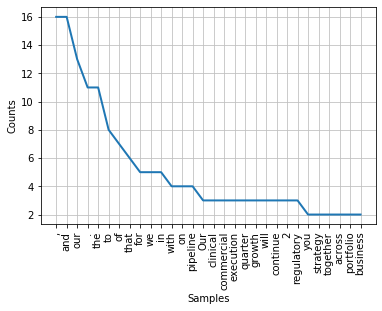

In [23]:
#Take a look at the frequency plot too.
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

**We can see there are some words less meaningful to our analysis**
<br>They are actually considered as noise in the text - called Stopwords. For example: is, am, are, this, a, an, the, etc. By removing these stopwords, we can import a list of stopwords and filter out out list of tokens from these words.

In [82]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)
#Take a look at the stopwords

{'a', 'doesn', 'because', 'them', 'once', 'each', 'needn', 'my', 'me', 'its', 'about', 'yourself', 'most', 'now', 'i', 've', "wasn't", 'him', 'couldn', "needn't", "mightn't", 'should', 'hadn', 'but', 'during', 'up', 'on', 'll', 'mightn', "that'll", "doesn't", 'as', 'aren', 'those', 'here', 'few', 'can', 'same', 'why', 'we', 'she', 'are', 'below', 'by', "isn't", 'above', 'hers', 'been', 'so', "aren't", 'do', "mustn't", "couldn't", 'd', 'own', 'nor', 'have', 'doing', 'while', 'didn', 'has', 'of', 'haven', 'myself', 'itself', 'against', 'your', 'down', 'am', 'what', 'this', "hasn't", 'in', 'mustn', "wouldn't", "you've", 'for', 'there', 'at', 'their', 'theirs', "she's", 'ourselves', 'how', 'don', 'weren', 'than', 'is', 'no', 'hasn', 'and', 's', 'the', 'such', 'whom', 'only', 'it', 'they', 'if', 'too', "won't", 'yourselves', 'be', "shan't", 'where', 'which', 'or', "don't", 'being', 'again', 'between', 'themselves', 'through', 'yours', 'won', 'with', 't', "shouldn't", 'out', 'just', 'he', 'h

In [86]:
#filter the stopwords 
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['Thank', ',', 'Teri', '.', 'Good', 'morning', ',', 'thank', 'joining', 'call', '.', 'Our', 'science-led', 'strategy', ',', 'together', 'clinical', 'commercial', 'execution', 'drove', 'another', 'quarter', 'accelerating', 'revenue', 'growth', 'strength', 'across', 'global', 'portfolio', '.', 'Our', 'results', 'demonstrate', 'continued', 'momentum', 'business', 'first', 'half', 'year', 'show', 'focus', 'kind', 'innovation', 'significantly', 'improves', 'health', 'outcome', 'paying', '.', 'As', 'highlighted', 'recent', 'Investor', 'Day', ',', 'confident', 'innovative', 'portfolio', 'products', 'significant', 'pipeline', 'opportunities', ',', 'supported', 'unparalleled', 'R', '&', 'D', 'commercial', 'execution', ',', 'continue', 'drive', 'strong', 'growth', 'invest', 'cutting-edge', 'science', 'deliver', 'breakthroughs', 'next', 'decade', 'beyond', '.', 'Over', 'past', 'quarter', ',', 'continue', 'advance', 'pipeline', 'presented', 'encouraging', 'data', 'across', 'progr

In [87]:
fdist_filter = FreqDist(filtered_sent)

In [88]:
fdist_filter.most_common(10) #now we have a new top 10 common words for the paragraph

[(',', 16),
 ('.', 11),
 ('pipeline', 4),
 ('Our', 3),
 ('clinical', 3),
 ('commercial', 3),
 ('execution', 3),
 ('quarter', 3),
 ('growth', 3),
 ('continue', 3)]

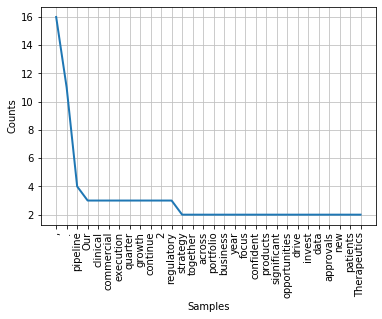

In [89]:
#New frequency plot for top 10 common words
fdist_filter.plot(30,cumulative=False)
plt.show()